In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#load data
import pandas as pd
iris_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/simple ML algo - supervised - iris/iris.data', encoding='utf-8', header=None)

#add lable
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#view data
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#basic stats about class data
iris_data['class'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: class, dtype: object

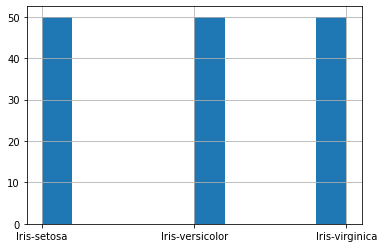

In [4]:
iris_data['class'].hist()

In [5]:
#select row based on class category
sentosa = iris_data[iris_data['class'] == 'Iris-setosa']

#remove
n_sentosa = sentosa.drop(['class'], axis=1)

In [6]:
def selectbycategory(x,y):
  return iris_data[iris_data[x] == y].drop([x], axis=1)

In [7]:
sentosa = selectbycategory('class', 'Iris-setosa')
versicolor = selectbycategory('class', 'Iris-versicolor') 
virginica = selectbycategory('class', 'Iris-virginica')

In [8]:
#categorical value to numerical value
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

target = iris_data['class'].unique()
le.fit(target)
target = le.transform(target)
target

array([0, 1, 2])

# Feedforward

In [9]:
#generate random number for v value
import numpy as np
import random
from numpy.random import default_rng

rand = random.randint(1,100000)
n_input = 4
n_hidden = 3
n_output = 3
learning_rate = 0.5

default_rng(rand).random((n_input,n_hidden))

array([[0.43250205, 0.96634187, 0.73111685],
       [0.37417777, 0.72883264, 0.60954019],
       [0.52351028, 0.94029703, 0.58098178],
       [0.48598538, 0.6684755 , 0.97542772]])

In [10]:
def randlayer(input,hidden,seed='rand'):
  if seed == 'rand':
    seed = random.randint(1,100000)
  return default_rng(seed).random((input,hidden))

In [11]:
v = randlayer(n_input,n_hidden,seed=42)
v

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363],
       [0.45038594, 0.37079802, 0.92676499]])

In [12]:
#generate random number for w value
w = randlayer(n_hidden,n_output,seed=86)
w

array([[0.61546232, 0.17535424, 0.6155847 ],
       [0.3725441 , 0.36834903, 0.79364509],
       [0.95947102, 0.13162562, 0.4040508 ]])

In [13]:
#select 1st row as input
sentosa.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [14]:
#changed to numpy array
firstrow = sentosa.loc[0].to_numpy()
firstrow

array([5.1, 3.5, 1.4, 0.2])

In [15]:
#product the two array to produce z_in 
z_in = np.dot(firstrow,v)
z_in

array([7.54363672, 3.74255039, 8.15823971])

In [16]:
#value for z - activation function 
import math 

z1 = 1/(1+math.exp(-z_in[0]))
z1

0.9994708116012353

In [17]:
#activation function used : sigmoid 
z = []

for x in range(n_hidden):
  z.append(1/(1+math.exp(-z_in[x])))

z = np.array(z)
z

array([0.99947081, 0.9768548 , 0.99971372])

In [18]:
#value for y - activation func 
y_in = np.dot(z,w)
y_in

array([1.93825446, 0.6666729 , 1.79447008])

In [19]:
y = []
for x in range(n_output):
  y.append(1/(1+math.exp(-y_in[x])))

y = np.array(y)
y

array([0.87416025, 0.66075777, 0.85747445])

# Backpropagation of Error

In [20]:
delta_k = []
for x in range(n_output):
  delta_k.append((target[x]-y[x])*(y[x])*(1-y[x]))

delta_k = np.array(delta_k)
delta_k 

array([-0.09616122,  0.0760435 ,  0.13963035])

In [21]:
wc = []
for y in range(n_output):
  for x in range(n_hidden):
    wc.append(learning_rate*delta_k[y]*z[x])

wc = np.array(wc)
wc = wc.reshape(n_hidden,n_output)
wc

array([[-0.04805516, -0.04696777, -0.04806684],
       [ 0.03800163,  0.03714173,  0.03801087],
       [ 0.06977823,  0.06819929,  0.06979519]])

In [22]:
delta_z_in = []
for y in range(n_output):
  for x in range(n_hidden):
    delta_z_in.append(delta_k[y]*w[x])

np.array(delta_z_in)

array([[-0.05918361, -0.01686228, -0.05919537],
       [-0.03582429, -0.03542089, -0.07631788],
       [-0.0922639 , -0.01265728, -0.03885402],
       [ 0.04680191,  0.01333455,  0.04681122],
       [ 0.02832956,  0.02801055,  0.06035155],
       [ 0.07296154,  0.01000927,  0.03072544],
       [ 0.08593722,  0.02448478,  0.08595431],
       [ 0.05201847,  0.05143271,  0.11081695],
       [ 0.13397128,  0.01837893,  0.05641776]])

In [23]:
delta_z_in_product = np.dot(delta_z_in,z)
delta_z_in_product = delta_z_in_product.reshape(n_hidden,n_output)
delta_z_in_product

array([[-0.13480271, -0.14670243, -0.14342229],
       [ 0.10660088,  0.11601108,  0.11341717],
       [ 0.19573952,  0.21301844,  0.20825554]])

In [24]:
z_minus = []
for x in range(n_hidden):
  z_minus.append(1-z[x])

z_minus = np.array(z_minus)
z_minus

array([0.00052919, 0.0231452 , 0.00028628])

In [25]:
delta_z = np.dot(z_minus,delta_z_in_product)
delta_z

array([0.002452  , 0.00266845, 0.00260879])

In [26]:
vc = []
for x in range(n_input):
  for y in range(n_hidden):
    vc.append(learning_rate*delta_z[y]*firstrow[x])

vc = np.array(vc)
vc = vc.reshape(n_input,n_hidden)
vc

array([[0.0062526 , 0.00680455, 0.00665241],
       [0.004291  , 0.00466979, 0.00456538],
       [0.0017164 , 0.00186792, 0.00182615],
       [0.0002452 , 0.00026685, 0.00026088]])

# Weight Changed

In [27]:
new_v = np.add(v,vc)
new_v

array([[0.78020865, 0.44568299, 0.86525033],
       [0.70165903, 0.09884714, 0.98018773],
       [0.7628561 , 0.78793222, 0.12993978],
       [0.45063114, 0.37106487, 0.92702587]])

In [28]:
new_w = np.add(w,wc)
new_w

array([[0.56740715, 0.12838647, 0.56751786],
       [0.41054573, 0.40549076, 0.83165596],
       [1.02924925, 0.19982491, 0.47384599]])